In [ ]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imghdr

data_dir = '/content/drive/MyDrive/шарага/диплом/проект/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             # print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3727 files belonging to 12 classes.


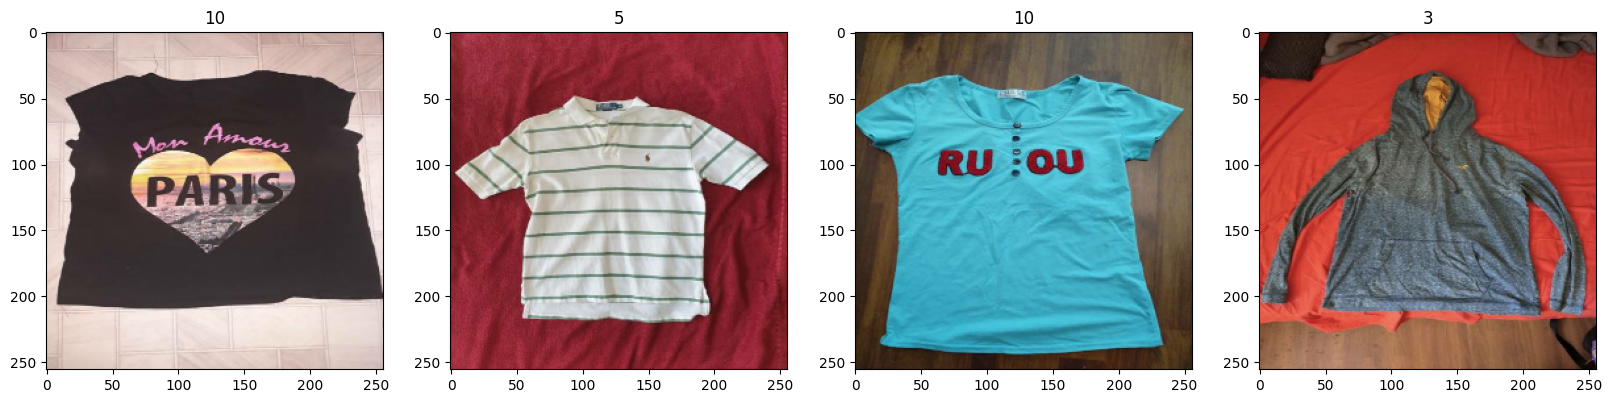

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[1.31195664e-01, 1.15509391e-01, 8.02152753e-02],
          [1.51102945e-01, 1.35416672e-01, 1.00122549e-01],
          [1.55269608e-01, 1.39583334e-01, 1.04289219e-01],
          ...,
          [2.67635316e-01, 2.32341215e-01, 1.73517689e-01],
          [2.33779728e-01, 1.98485613e-01, 1.39662087e-01],
          [1.93971395e-01, 1.58677280e-01, 9.98537540e-02]],
 
         [[1.31617650e-01, 1.15931369e-01, 8.06372538e-02],
          [1.47181377e-01, 1.31495103e-01, 9.62009802e-02],
          [1.49897322e-01, 1.34211048e-01, 9.89169255e-02],
          ...,
          [2.59944886e-01, 2.24650785e-01, 1.65827259e-01],
          [2.38495708e-01, 2.03201592e-01, 1.44378066e-01],
          [2.00668514e-01, 1.65374398e-01, 1.06550865e-01]],
 
         [[1.31617650e-01, 1.15931369e-01, 8.06372538e-02],
          [1.41539574e-01, 1.25853300e-01, 9.05591771e-02],
          [1.45784751e-01, 1.30098477e-01, 9.48043540e-02],
          ...,
          [2.45200247e-01, 2.09906131e-01, 1.5108

In [ ]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(12, activation='sigmoid'))
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
93/93 [==============================] - 236s 2s/step - loss: 1.7497 - accuracy: 0.4439 - val_loss: 1.4545 - val_accuracy: 0.5897
Epoch 2/50
93/93 [==============================] - 241s 3s/step - loss: 1.2021 - accuracy: 0.6347 - val_loss: 1.1377 - val_accuracy: 0.6712
Epoch 3/50
93/93 [==============================] - 233s 3s/step - loss: 0.9101 - accuracy: 0.7120 - val_loss: 0.9750 - val_accuracy: 0.6875
Epoch 4/50
93/93 [==============================] - 240s 3s/step - loss: 0.7096 - accuracy: 0.7718 - val_loss: 0.9734 - val_accuracy: 0.7133
Epoch 5/50
93/93 [==============================] - 224s 2s/step - loss: 0.4989 - accuracy: 0.8397 - val_loss: 1.0009 - val_accuracy: 0.7351
Epoch 6/50
93/93 [==============================] - 241s 3s/step - loss: 0.3691 - accuracy: 0.8750 - val_loss: 1.1380 - val_accuracy: 0.7283
Epoch 7/50
93/93 [==============================] - 226s 2s/step - loss: 0.2640 - accuracy: 0.9177 - val_loss: 1.0453 - val_accuracy: 0.7446
Epoch 8/50
93

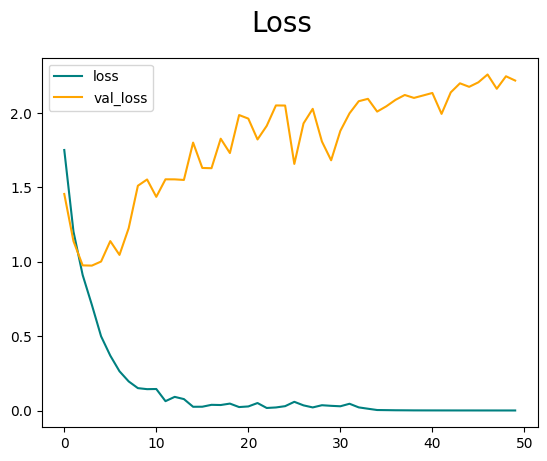

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

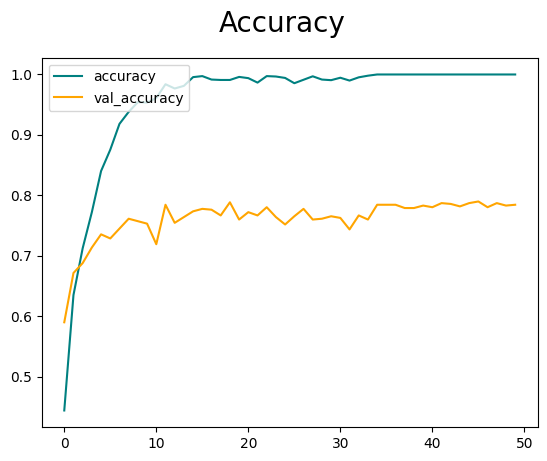

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

TypeError: ignored

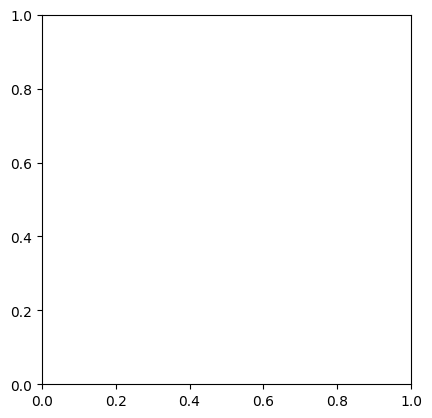

In [ ]:
import cv2
img = cv2.imread('/content/поло.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
model.predict(np.expand_dims(resize/255, 0))


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))